<a href="https://colab.research.google.com/github/NEYRIB/Projeto-dados-com-Python-e-Pandas-DIO/blob/main/Projeto_dados_com_Python_e_Pandas_dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disclaimer**
#**1ª Etapa - Análise do mês**
Premissas;

*Análise das Compras feitas no mês*

*Análise das Vendas feitas no mês*
#**2ª Etapa - Apuração dos Impostos: ICMS, IPI, PIS e COFINS**
Premissas;

*-Regime de Tributação Lucro Real (débito/crédito)*

*-ICMS e IPI base informada no documento fiscal*

*-PIS e COFINS 1,65% e 7,60%*

*-CFOPs considerados: Compras 1102 e 1403 e Insumos, Vendas 5102*

# Suporte

In [309]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [311]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving RelatorioNFe-entradas_limpa.xlsx to RelatorioNFe-entradas_limpa.xlsx
Saving RelatorioNFe-saidas_limpa.xlsx to RelatorioNFe-saidas_limpa.xlsx


#**Análise do mês**

#*Análise da Planilha com Notas Fiscais de Compras*

In [312]:
#Criando DataFrame de Compras
dfcompras = pd.read_excel("RelatorioNFe-entradas_limpa.xlsx")

In [313]:
#Visualizando as 5 primeiras linhas
dfcompras.head()

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
0,335953,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,00.189.864/0001-56,BOBINAS PECAS,333.00,2021-07-12,-,333.00,0.0,0.0,A vista
1,222350,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,01.111.114/0001-11,COMERCIAL DE MAT. ESCRITORIO,563.11,2021-07-07,-,561.11,0.0,0.0,28 dias
2,222603,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,01.111.114/0001-11,COMERCIAL DE MAT. ESCRITORIO,1456.56,2021-07-15,-,1454.56,0.0,0.0,28 dias
3,223025,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,01.111.114/0001-11,COMERCIAL DE MAT. ESCRITORIO,1458.64,2021-07-22,-,1458.64,0.0,0.0,28 dias
4,223069,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,01.111.114/0001-11,COMERCIAL DE MAT. ESCRITORIO,65.80,2021-07-23,-,63.80,0.0,0.0,28 dias


In [314]:
#Quantidade de linhas e colunas
dfcompras.shape

(86, 15)

In [315]:
#Verificando os tipos de dados
dfcompras.dtypes

Nº da Nota - Compra                      int64
Tipo Oper.  - Compra                    object
Natureza Operação  - Compra             object
CNPJ Destinatário  - Compra             object
Razão Social Destinatário  - Compra     object
UF Dest - Compra                        object
CNPJ Emitente - Compra                  object
Razão Social Emitente - Compra          object
Valor da Nota Fiscal - Compra          float64
Emissão - Compra                        object
Data Entr. Saída - Compra               object
Valor dos Produtos - Compra            float64
Total ICMS - Compra                    float64
Total IPI - Compra                     float64
Forma de Pagamento - Compra             object
dtype: object

In [316]:
#Alterando o tipo de dado das colunas Compras
dfcompras["Nº da Nota - Compra"] = dfcompras["Nº da Nota - Compra"].astype("object")
dfcompras["Emissão - Compra"] = dfcompras["Emissão - Compra"].astype("datetime64[ns]")

In [317]:
#Verificando os tipos de dados
dfcompras.dtypes

Nº da Nota - Compra                            object
Tipo Oper.  - Compra                           object
Natureza Operação  - Compra                    object
CNPJ Destinatário  - Compra                    object
Razão Social Destinatário  - Compra            object
UF Dest - Compra                               object
CNPJ Emitente - Compra                         object
Razão Social Emitente - Compra                 object
Valor da Nota Fiscal - Compra                 float64
Emissão - Compra                       datetime64[ns]
Data Entr. Saída - Compra                      object
Valor dos Produtos - Compra                   float64
Total ICMS - Compra                           float64
Total IPI - Compra                            float64
Forma de Pagamento - Compra                    object
dtype: object

In [318]:
#Consultando linhas com valores faltantes
dfcompras.isnull().sum()

Nº da Nota - Compra                    0
Tipo Oper.  - Compra                   0
Natureza Operação  - Compra            0
CNPJ Destinatário  - Compra            0
Razão Social Destinatário  - Compra    0
UF Dest - Compra                       0
CNPJ Emitente - Compra                 0
Razão Social Emitente - Compra         0
Valor da Nota Fiscal - Compra          0
Emissão - Compra                       0
Data Entr. Saída - Compra              0
Valor dos Produtos - Compra            0
Total ICMS - Compra                    0
Total IPI - Compra                     0
Forma de Pagamento - Compra            0
dtype: int64

In [319]:
dfcompras.sample(3)

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
78,359737,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,05.097.111/0001-14,R CAIXAS LTDA,24846.21,2021-07-17,-,24846.21,993.85,0.00,42 DIAS
48,97535,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,04.155.016/0001-74,FA BOBINAS S.A.,20857.97,2021-07-20,-,15909.21,1909.09,1185.35,42 DIAS
9,50973,1 - Entrada,1403 - Compra para comercialização ST,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,06.150.119/0001-59,ATACADO PAPELÃO LTDA,882.58,2021-07-09,-,882.58,0.00,0.00,28 dias


In [320]:
#Retornando a maior Compra
dfcompras["Valor da Nota Fiscal - Compra"].max()

163145.14

In [321]:
#Retornando a menor Compra
dfcompras["Valor da Nota Fiscal - Compra"].min()

20.0

In [322]:
#Retornando a média das Compras
round(dfcompras["Valor da Nota Fiscal - Compra"].mean(),2)

19106.37

In [323]:
#Retonando em ordem decrescente 3 Maiores Compras
dfcompras.nlargest(3, "Valor da Nota Fiscal - Compra")

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
50,97532,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,04.155.016/0001-74,FA BOBINAS S.A.,163145.14,2021-07-20,-,125979.84,14687.29,7415.68,42 DIAS
80,359720,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,05.097.111/0001-14,R CAIXAS LTDA,109971.04,2021-07-17,-,109971.04,4398.84,0.00,42 DIAS
85,320953,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,05.097.111/0001-14,R CAIXAS LTDA,105855.38,2021-07-29,-,105855.38,4234.22,0.00,42 DIAS


In [324]:
#Retonando em ordem crescente 3 Menores Compras
dfcompras.nsmallest(3, "Valor da Nota Fiscal - Compra")

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
33,329650,1 - Entrada,1403 - Compra para comercialização ST,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,40.411.544/0146-74,CLARO S.A,20.0,2021-07-14,-,20.0,0.0,0.0,A vista
4,223069,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,01.111.114/0001-11,COMERCIAL DE MAT. ESCRITORIO,65.8,2021-07-23,-,63.8,0.0,0.0,28 dias
5,223077,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,01.111.114/0001-11,COMERCIAL DE MAT. ESCRITORIO,112.4,2021-07-23,-,110.4,0.0,0.0,28 dias


In [325]:
#Ordenando o conjunto de dados
dfcompras.sort_values("Valor da Nota Fiscal - Compra", ascending=False).head(10)

,Nº da Nota - Compra,Tipo Oper. - Compra,Natureza Operação - Compra,CNPJ Destinatário - Compra,Razão Social Destinatário - Compra,UF Dest - Compra,CNPJ Emitente - Compra,Razão Social Emitente - Compra,Valor da Nota Fiscal - Compra,Emissão - Compra,Data Entr. Saída - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra,Forma de Pagamento - Compra
50,97532,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,04.155.016/0001-74,FA BOBINAS S.A.,163145.14,2021-07-20,-,125979.84,14687.29,7415.68,42 DIAS
80,359720,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,05.097.111/0001-14,R CAIXAS LTDA,109971.04,2021-07-17,-,109971.04,4398.84,0.00,42 DIAS
85,320953,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,05.097.111/0001-14,R CAIXAS LTDA,105855.38,2021-07-29,-,105855.38,4234.22,0.00,42 DIAS
79,359759,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,05.097.111/0001-14,R CAIXAS LTDA,102902.14,2021-07-17,-,102902.14,4116.09,0.00,42 DIAS
75,3272,1 - Entrada,2653 - Compra de combustível ou lubrificante,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,00.616.970/0001-05,CLUB PAPEL LTDA,102066.47,2021-07-09,-,75376.10,0.00,0.00,42 DIAS
46,97532,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,04.155.016/0001-74,FA BOBINAS S.A.,89575.35,2021-07-20,-,68871.12,7984.74,4331.51,42 DIAS
84,320950,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,05.097.111/0001-14,R CAIXAS LTDA,87423.06,2021-07-29,-,87423.06,3496.92,0.00,42 DIAS
52,97263,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,04.155.016/0001-74,FA BOBINAS S.A.,76105.56,2021-07-21,-,57562.45,6378.97,4249.90,42 DIAS
54,27562,1 - Entrada,1102 - Compra para comercialização,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,11.145.571/0001-10,DQUIM PRODUTOS EIRELI,70947.60,2021-07-28,-,70947.60,8513.71,0.00,A vista
73,3207,1 - Entrada,2653 - Compra de combustível ou lubrificante,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,MG,00.616.970/0001-05,CLUB PAPEL LTDA,70248.17,2021-07-01,-,51878.28,0.00,0.00,42 DIAS


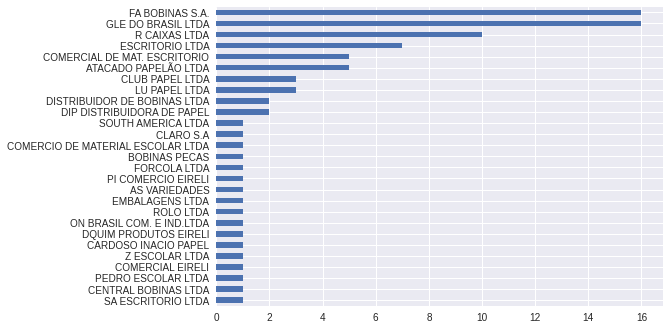

In [326]:
#Gráfico de barras horizontais
dfcompras["Razão Social Emitente - Compra"].value_counts(ascending=True).plot.barh();

In [327]:
#Agrupamento Natureza da Operação (importante para apuração dos Créditos dos impostos)
dfcompras.groupby("Natureza Operação  - Compra")["Valor da Nota Fiscal - Compra"].sum()

Natureza Operação  - Compra
1102 - Compra para comercialização                1151303.98
1202 - Devolução venda de mercadoria adquirida        203.84
1403 - Compra para comercialização ST              174047.52
1653 - Compra de combustível ou lubrificante        64603.28
1922 - Simples faturamento para entrega futura      18405.89
2653 - Compra de combustível ou lubrificante       234258.57
6556 - Devolução de material de uso ou consumo        324.48
Name: Valor da Nota Fiscal - Compra, dtype: float64

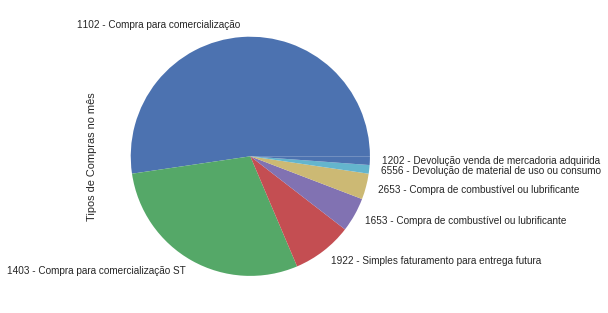

In [328]:
#Gráfico de Pizza
dfcompras["Natureza Operação  - Compra"].value_counts().plot.pie()
plt.ylabel("Tipos de Compras no mês");

In [329]:
#Estatísticas
dfcompras.describe()

,Valor da Nota Fiscal - Compra,Valor dos Produtos - Compra,Total ICMS - Compra,Total IPI - Compra
count,86.000000,86.000000,86.000000,86.000000
mean,19106.366977,16313.183488,1043.616047,441.680814
std,33952.861869,29374.947008,2356.979240,1210.171742
min,20.000000,20.000000,0.000000,0.000000
25%,569.832500,564.922500,0.000000,0.000000
50%,2046.745000,2163.450000,40.710000,0.000000
75%,20402.442500,15257.627500,503.375000,61.717500
max,163145.140000,125979.840000,14687.290000,7415.680000


#*Análise da Planilha com Notas Fiscais de Vendas*

In [330]:
#Criando DataFrame de Vendas
dfvendas = pd.read_excel("RelatorioNFe-saidas_limpa.xlsx")

In [331]:
#Visualizando as 5 primeiras linhas
dfvendas.head()

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
0,43363,1 - Saída,5102 - Venda de mercadoria,19.697.697/0001-66,CAITANO PAPEL,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,2034.66,2021-07-01,-,2034.66,0.0,0.0,28 DIAS
1,43364,1 - Saída,5102 - Venda de mercadoria,76.977.957/0001-46,MAIA PAPEL,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,646.56,2021-07-01,-,646.56,0.0,0.0,A VISTA
2,43365,1 - Saída,5102 - Venda de mercadoria,59.961.974/0001-74,SILVA PAPEL,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,759.60,2021-07-01,-,759.60,0.0,0.0,A VISTA
3,43366,1 - Saída,5102 - Venda de mercadoria,17.466.499/0001-00,SPARTA CENTRO ESCRITORIO LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,813.60,2021-07-01,-,813.60,0.0,0.0,A VISTA
4,43367,1 - Saída,5102 - Venda de mercadoria,19.197.619/0001-96,COMERCIO DE BOBINAS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,762.00,2021-07-01,-,762.00,0.0,0.0,A VISTA


In [332]:
#Quantidade de linhas e colunas
dfvendas.shape

(1483, 15)

In [333]:
#Verificando os tipos de dados
dfvendas.dtypes

Nº da Nota - Venda                     int64
Tipo Oper. - Venda                    object
Natureza Operação - Venda             object
CNPJ Destinatário - Venda             object
Razão Social Destinatário - Venda     object
UF Dest - Venda                       object
CNPJ Emitente - Venda                 object
Razão Social Emitente - Venda         object
Valor da Nota Fiscal - Venda         float64
Emissão - Venda                       object
Data Entr. Saída - Venda              object
Valor dos Produtos - Venda           float64
Total ICMS - Venda                   float64
Total IPI - Venda                    float64
Forma de Pagamento - Venda            object
dtype: object

In [334]:
#Alterando o tipo de dado das colunas Compras
dfvendas["Nº da Nota - Venda"] = dfvendas["Nº da Nota - Venda"].astype("object")
dfvendas["Emissão - Venda"] = dfvendas["Emissão - Venda"].astype("datetime64[ns]")

In [335]:
#Verificando os tipos de dados
dfvendas.dtypes

Nº da Nota - Venda                           object
Tipo Oper. - Venda                           object
Natureza Operação - Venda                    object
CNPJ Destinatário - Venda                    object
Razão Social Destinatário - Venda            object
UF Dest - Venda                              object
CNPJ Emitente - Venda                        object
Razão Social Emitente - Venda                object
Valor da Nota Fiscal - Venda                float64
Emissão - Venda                      datetime64[ns]
Data Entr. Saída - Venda                     object
Valor dos Produtos - Venda                  float64
Total ICMS - Venda                          float64
Total IPI - Venda                           float64
Forma de Pagamento - Venda                   object
dtype: object

In [336]:
#Consultando linhas com valores faltantes
dfvendas.isnull().sum()

Nº da Nota - Venda                   0
Tipo Oper. - Venda                   0
Natureza Operação - Venda            0
CNPJ Destinatário - Venda            0
Razão Social Destinatário - Venda    0
UF Dest - Venda                      0
CNPJ Emitente - Venda                0
Razão Social Emitente - Venda        0
Valor da Nota Fiscal - Venda         0
Emissão - Venda                      0
Data Entr. Saída - Venda             0
Valor dos Produtos - Venda           0
Total ICMS - Venda                   0
Total IPI - Venda                    0
Forma de Pagamento - Venda           0
dtype: int64

In [337]:
dfvendas.sample(3)

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
314,43385,1 - Saída,5102 - Venda de mercadoria,70.914.695/0001-00,O REI DO COLA CENTRO ESCRITORIO LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,3731.74,2021-07-07,-,3731.74,0.00,0.0,28 DIAS
845,43959,1 - Saída,5102 - Venda de mercadoria,56.794.596/0001-95,SALA ABASTECA AQUI ANEL LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,276.88,2021-07-19,-,276.88,19.74,0.0,A VISTA
213,43279,1 - Saída,5102 - Venda de mercadoria,11.757.771/0001-19,BH BOBINAS LTDA - ME,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,1885.84,2021-07-06,-,1885.84,0.00,0.0,28 DIAS


In [338]:
#Retornando a maior Venda do mês
dfvendas["Valor da Nota Fiscal - Venda"].max()

62277.6

In [339]:
#Retornando a menor Venda do mês
dfvendas["Valor da Nota Fiscal - Venda"].min()

75.42

In [340]:
#Retornando a média das Vendas do mês
round(dfvendas["Valor da Nota Fiscal - Venda"].mean(), 2)

1829.54

In [341]:
#Retonando em ordem decrescente 3 Maiores Compras
dfvendas.nlargest(3, "Valor da Nota Fiscal - Venda")

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
757,43833,1 - Saída,5102 - Venda de mercadoria,16.655.965/0001-96,CEDA BITTS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,62277.6,2021-07-15,-,62277.6,0.0,0.0,42 Dias
508,44479,1 - Saída,5102 - Venda de mercadoria,50.999.976/0001-99,RFX DISTRIBUIDORA DE PRODUTOS ESCRITORIOS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,56410.4,2021-07-12,-,56410.4,0.0,0.0,42 Dias
1434,44553,1 - Saída,5102 - Venda de mercadoria,79.771.717/0001-96,LIDER PAPEL PECAS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,32393.2,2021-07-30,-,32393.2,0.0,0.0,42 Dias


In [342]:
#Retonando em ordem crescente 3 Menores Compras
dfvendas.nsmallest(3, "Valor da Nota Fiscal - Venda")

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
775,43848,1 - Saída,5202 - Devolução de compra para comercialização,00.616.970/0005-06,TECLUB INDUSTRIA E COMERCIO DE BOBINAS LTDA,PR,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,75.42,2021-07-16,-,58.97,0.00,0.0,A VISTA
55,43558,1 - Saída,5102 - Venda de mercadoria,41.517.704/0001-50,SAO CRISTOVAO ESCRITORIO LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,106.08,2021-07-01,-,106.08,19.09,0.0,A VISTA
428,43498,1 - Saída,5102 - Venda de mercadoria,19.999.667/0001-99,MARCHALENTA CEDA SERVICOS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,124.45,2021-07-09,-,124.45,8.42,0.0,A VISTA


In [343]:
#Ordenando o conjunto de dados
dfvendas.sort_values("Valor da Nota Fiscal - Venda", ascending=False).head(10)

,Nº da Nota - Venda,Tipo Oper. - Venda,Natureza Operação - Venda,CNPJ Destinatário - Venda,Razão Social Destinatário - Venda,UF Dest - Venda,CNPJ Emitente - Venda,Razão Social Emitente - Venda,Valor da Nota Fiscal - Venda,Emissão - Venda,Data Entr. Saída - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda,Forma de Pagamento - Venda
757,43833,1 - Saída,5102 - Venda de mercadoria,16.655.965/0001-96,CEDA BITTS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,62277.60,2021-07-15,-,62277.60,0.00,0.0,42 Dias
508,44479,1 - Saída,5102 - Venda de mercadoria,50.999.976/0001-99,RFX DISTRIBUIDORA DE PRODUTOS ESCRITORIOS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,56410.40,2021-07-12,-,56410.40,0.00,0.0,42 Dias
1434,44553,1 - Saída,5102 - Venda de mercadoria,79.771.717/0001-96,LIDER PAPEL PECAS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,32393.20,2021-07-30,-,32393.20,0.00,0.0,42 Dias
1016,44395,1 - Saída,5102 - Venda de mercadoria,57.196.166/0001-60,OTHON LUB LTDA - EPP,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,26880.00,2021-07-21,-,26880.00,0.00,0.0,42 Dias
1291,44369,1 - Saída,5102 - Venda de mercadoria,17.960.090/0001-66,CEDA SALA TREVINHO LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,25884.93,2021-07-28,-,25884.93,651.78,0.0,42 Dias
532,43633,1 - Saída,5102 - Venda de mercadoria,01.970.179/0001-77,CELT LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,24687.19,2021-07-12,-,24687.19,0.00,0.0,42 Dias
749,43825,1 - Saída,5102 - Venda de mercadoria,16.655.965/0007-69,CEDA BITTS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,23888.88,2021-07-15,-,23888.88,0.00,0.0,42 Dias
1375,44454,1 - Saída,5102 - Venda de mercadoria,57.196.166/0001-60,OTHON LUB LTDA - EPP,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,18930.00,2021-07-29,-,18930.00,0.00,0.0,42 Dias
291,43448,1 - Saída,5102 - Venda de mercadoria,79.771.717/0001-96,LIDER PAPEL PECAS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,15173.20,2021-07-07,-,15173.20,0.00,0.0,42 Dias
770,43843,1 - Saída,5102 - Venda de mercadoria,16.655.965/0004-79,CEDA BITTS LTDA,MG,17.011.236/0001-59,COMERCIAL CELULOSE S.A.,14680.32,2021-07-16,-,14680.32,0.00,0.0,42 Dias


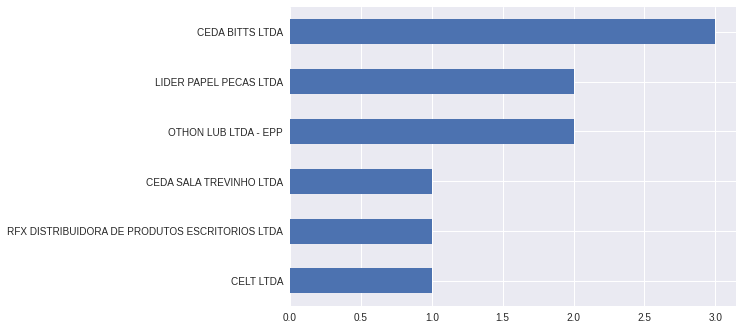

In [348]:
#Gráfico de barras horizontais
#dfvendas["Razão Social Destinatário - Venda"].value_counts(ascending=True).plot.barh();
dfvendas10 = dfvendas.nlargest(10, "Valor da Nota Fiscal - Venda")
dfvendas10["Razão Social Destinatário - Venda"].value_counts(ascending=True).plot.barh();

In [349]:
#Agrupamento Natureza da Operação (importante para apuração dos Créditos dos impostos)
dfvendas.groupby("Natureza Operação - Venda")["Valor da Nota Fiscal - Venda"].sum()

Natureza Operação - Venda
5102 - Venda de mercadoria                         2696894.23
5202 - Devolução de compra para comercialização      15955.43
5910 - Remessa em bonificação                          354.40
Name: Valor da Nota Fiscal - Venda, dtype: float64

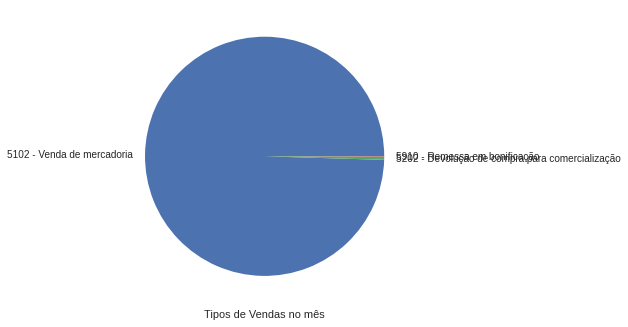

In [352]:
#Gráfico de Pizza
dfvendas["Natureza Operação - Venda"].value_counts().plot.pie()
plt.xlabel("Tipos de Vendas no mês");
plt.ylabel("");

In [353]:
#Estatíticas
dfvendas.describe()

,Valor da Nota Fiscal - Venda,Valor dos Produtos - Venda,Total ICMS - Venda,Total IPI - Venda
count,1483.000000,1483.000000,1483.000000,1483.0
mean,1829.537465,1826.478281,6.838672,0.0
std,3214.311593,3208.260327,30.885921,0.0
min,75.420000,58.970000,0.000000,0.0
25%,624.560000,624.560000,0.000000,0.0
50%,1014.960000,1014.960000,0.000000,0.0
75%,1943.200000,1936.345000,0.000000,0.0
max,62277.600000,62277.600000,651.780000,0.0


# **Apuração dos Impostos**

*Importante: TRATA-SE DE UMA SIMULAÇÃO UMA VEZ QUE É NECESSÁRIO MUITAS OUTRAS VARIÁVEIS PARA APURAÇÃO CORRETA*

In [354]:
#Arquivos para Análises
df1 = pd.read_excel("/content/RelatorioNFe-entradas_limpa.xlsx")
df2 = pd.read_excel("/content/RelatorioNFe-saidas_limpa.xlsx")

# **ICMS** - Imposto sobre Circulação de Mercadorias e Serviços

**Compras**

In [443]:
#Criando um novo DataFrame somente com os dados que serão usados na apuração do ICMS
icms_compras = df1.groupby("Natureza Operação  - Compra")["Total ICMS - Compra"].sum().sort_values(ascending=False).reset_index()

In [444]:
#Novo Dataframe criado
icms_compras

,Natureza Operação - Compra,Total ICMS - Compra
0,1102 - Compra para comercialização,79324.05
1,1403 - Compra para comercialização ST,10426.93
2,6556 - Devolução de material de uso ou consumo,0.00
3,2653 - Compra de combustível ou lubrificante,0.00
4,1922 - Simples faturamento para entrega futura,0.00
5,1653 - Compra de combustível ou lubrificante,0.00
6,1202 - Devolução venda de mercadoria adquirida,0.00


In [445]:
#Salvando uma nova planilha em excel
icms_compras.to_excel("relatoriocreditoicmscompras.xlsx", index=False)

In [446]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1102_icms = icms_compras.loc[icms_compras["Natureza Operação  - Compra"] == "1102 - Compra para comercialização"]

In [447]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1403_icms = icms_compras.loc[icms_compras["Natureza Operação  - Compra"] == "1403 - Compra para comercialização ST"]

In [448]:
#Totalizando os valores de crédito do ICMS para apuração
ICMS_CRED = round(cfop_1102_icms["Total ICMS - Compra"].sum() + cfop_1403_icms["Total ICMS - Compra"].sum(), 2)
ICMS_CRED

89750.98

**Vendas**

In [449]:
#Criando um novo DataFrame somente com os dados que serão usados para apuração
icms_vendas = df2.groupby("Natureza Operação - Venda")["Total ICMS - Venda"].sum().sort_values(ascending=False).reset_index()

In [450]:
#Novo Dataframe criado
icms_vendas

,Natureza Operação - Venda,Total ICMS - Venda
0,5102 - Venda de mercadoria,10141.75
1,5910 - Remessa em bonificação,0.00
2,5202 - Devolução de compra para comercialização,0.00


In [451]:
#Salvando uma nova planilha em excel
icms_vendas.to_excel("relatoriodebitoicmsvendas.xlsx", index=False)

In [452]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_5102_icms = icms_vendas.loc[icms_vendas["Natureza Operação - Venda"] == "5102 - Venda de mercadoria"]

In [453]:
#Totalizando o valor do crédito para apuração do ICMS destacado nas notas fiscais
ICMS_DEBIT = round(cfop_5102["Total ICMS - Venda"].sum(), 2)
ICMS_DEBIT

10141.75

**Cálculo ICMS - Vr. Positivo - Débito ICMS a pagar /// Vr. Negativo - Crédito de ICMS a Compensar**


In [454]:
#Valor de Crédito à Compensar no proxímos mês
ICMS_DEBIT - ICMS_CRED

-79609.23

# **IPI** - Imposto sobre Produtos Industrializados

**Compras**

In [455]:
#Criando um novo DataFrame somente com os dados que serão usados
ipi_compras = df1.groupby("Natureza Operação  - Compra")["Total IPI - Compra"].sum().sort_values(ascending=False).reset_index()
ipi_compras

,Natureza Operação - Compra,Total IPI - Compra
0,1102 - Compra para comercialização,29156.26
1,1403 - Compra para comercialização ST,8828.29
2,6556 - Devolução de material de uso ou consumo,0.00
3,2653 - Compra de combustível ou lubrificante,0.00
4,1922 - Simples faturamento para entrega futura,0.00
5,1653 - Compra de combustível ou lubrificante,0.00
6,1202 - Devolução venda de mercadoria adquirida,0.00


In [456]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1102_ipi = ipi_compras.loc[ipi_compras["Natureza Operação  - Compra"] == "1102 - Compra para comercialização"]

In [457]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1403_ipi = ipi_compras.loc[ipi_compras["Natureza Operação  - Compra"] == "1403 - Compra para comercialização ST"]

In [458]:
#Totalizando o valor do crédito para apuração do IPI destacado nas notas fiscais
IPI_CRED = round(cfop_1102_ipi["Total IPI - Compra"].sum() + cfop_1403_ipi["Total IPI - Compra"].sum(), 2)
IPI_CRED

37984.55

**Vendas**

In [459]:
#Criando um novo DataFrame somente com os dados que serão usados
ipi_vendas = df2.groupby("Natureza Operação - Venda")["Total IPI - Venda"].sum().sort_values(ascending=False).reset_index()
ipi_vendas

,Natureza Operação - Venda,Total IPI - Venda
0,5910 - Remessa em bonificação,0.0
1,5202 - Devolução de compra para comercialização,0.0
2,5102 - Venda de mercadoria,0.0


In [460]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_5102_ipi = ipi_vendas.loc[ipi_vendas["Natureza Operação - Venda"] == "5102 - Venda de mercadoria"]

In [461]:
#Totalizando o valor do crédito para apuração do IPI destacado nas notas fiscais
IPI_DEBIT = round(cfop_5102_ipi["Total IPI - Venda"].sum(), 2)
IPI_DEBIT

0.0

**Cálculo IPI - Vr. Positivo - Débito IPI a pagar /// Vr. Negativo - Crédito de IPI a Compensar**

In [462]:
#Valor de Crédito à Compensar no proxímos mês
IPI_DEBIT - IPI_CRED

-37984.55

# **PIS** - Programa de Integração Social

**Compras**

In [463]:
#Criando um novo DataFrame somente com os dados que serão usados
pis_compras = df1.groupby("Natureza Operação  - Compra")["Valor dos Produtos - Compra"].sum().sort_values(ascending=False).reset_index()
pis_compras

,Natureza Operação - Compra,Valor dos Produtos - Compra
0,1102 - Compra para comercialização,1013330.15
1,2653 - Compra de combustível ou lubrificante,172999.98
2,1403 - Compra para comercialização ST,130002.69
3,1653 - Compra de combustível ou lubrificante,67666.75
4,1922 - Simples faturamento para entrega futura,18405.89
5,6556 - Devolução de material de uso ou consumo,324.48
6,1202 - Devolução venda de mercadoria adquirida,203.84


In [464]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1102_pis = pis_compras.loc[pis_compras["Natureza Operação  - Compra"] == "1102 - Compra para comercialização"]

In [465]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_2653_pis = pis_compras.loc[pis_compras["Natureza Operação  - Compra"] == "2653 - Compra de combustível ou lubrificante"]

In [466]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1403_pis = pis_compras.loc[pis_compras["Natureza Operação  - Compra"] == "1403 - Compra para comercialização ST"]

In [467]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1653_pis = pis_compras.loc[pis_compras["Natureza Operação  - Compra"] == "1653 - Compra de combustível ou lubrificante"]

In [468]:
#Totalizando o valor do crédito para apuração do ICMS destacado nas notas fiscais
BASE_PIS_CRED = round(cfop_1102_pis["Valor dos Produtos - Compra"].sum() + cfop_2653_pis["Valor dos Produtos - Compra"].sum() + cfop_1403_pis["Valor dos Produtos - Compra"].sum() + cfop_1653_pis["Valor dos Produtos - Compra"].sum(), 2)
BASE_PIS_CRED

1383999.57

In [469]:
#Valor de crédito apurado de PIS
PIS_CRED = round(BASE_PIS_CRED * 0.0165,2)
PIS_CRED

22835.99

**Vendas**

In [470]:
#Criando um novo DataFrame somente com os dados que serão usados
pis_vendas = df2.groupby("Natureza Operação - Venda")["Valor dos Produtos - Venda"].sum().sort_values(ascending=False).reset_index()
pis_vendas

,Natureza Operação - Venda,Valor dos Produtos - Venda
0,5102 - Venda de mercadoria,2696228.71
1,5202 - Devolução de compra para comercialização,12084.18
2,5910 - Remessa em bonificação,354.40


In [471]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_5102_pis = pis_vendas.loc[pis_vendas["Natureza Operação - Venda"] == "5102 - Venda de mercadoria"]

In [472]:
#Totalizando o valor do crédito para apuração do ICMS destacado nas notas fiscais
BASE_PIS_DEBIT = round(cfop_5102_pis["Valor dos Produtos - Venda"].sum(), 2)
BASE_PIS_DEBIT

2696228.71

In [473]:
#Valor do débito apurado de PIS
PIS_DEBIT = round(BASE_PIS_DEBIT * 0.0165,2)
PIS_DEBIT

44487.77

**Cálculo PIS - Vr. Positivo - Débito PIS a pagar /// Vr. Negativo - Crédito de PIS a Compensar**

In [474]:
#Valor apurado a pagar
round(PIS_DEBIT - PIS_CRED, 2)

21651.78

# **COFINS** - Contribuição para o Financiamento da Seguridade Social

**Compras**

In [475]:
#Criando um novo DataFrame somente com os dados que serão usados
cofins_compras = df1.groupby("Natureza Operação  - Compra")["Valor dos Produtos - Compra"].sum().sort_values(ascending=False).reset_index()
cofins_compras

,Natureza Operação - Compra,Valor dos Produtos - Compra
0,1102 - Compra para comercialização,1013330.15
1,2653 - Compra de combustível ou lubrificante,172999.98
2,1403 - Compra para comercialização ST,130002.69
3,1653 - Compra de combustível ou lubrificante,67666.75
4,1922 - Simples faturamento para entrega futura,18405.89
5,6556 - Devolução de material de uso ou consumo,324.48
6,1202 - Devolução venda de mercadoria adquirida,203.84


In [476]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1102_cofins = cofins_compras.loc[cofins_compras["Natureza Operação  - Compra"] == "1102 - Compra para comercialização"]

In [477]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_2653_cofins = cofins_compras.loc[cofins_compras["Natureza Operação  - Compra"] == "2653 - Compra de combustível ou lubrificante"]

In [478]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1403_cofins = cofins_compras.loc[cofins_compras["Natureza Operação  - Compra"] == "1403 - Compra para comercialização ST	"]

In [479]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_1653_cofins = cofins_compras.loc[cofins_compras["Natureza Operação  - Compra"] == "1653 - Compra de combustível ou lubrificante"]

In [480]:
#Totalizando o valor do crédito para apuração do ICMS destacado nas notas fiscais
BASE_COFINS_CRED = round(cfop_1102_cofins["Valor dos Produtos - Compra"].sum() + cfop_2653_cofins["Valor dos Produtos - Compra"].sum() + cfop_1403_cofins["Valor dos Produtos - Compra"].sum() + cfop_1653_cofins["Valor dos Produtos - Compra"].sum(), 2)
BASE_COFINS_CRED

1253996.88

In [481]:
#Valor do crédito apurado de COFINS
COFINS_CRED = round(BASE_COFINS_CRED * 0.0760,2)
COFINS_CRED

95303.76

**Vendas**

In [482]:
#Criando um novo DataFrame somente com os dados que serão usados
cofins_vendas = df2.groupby("Natureza Operação - Venda")["Valor dos Produtos - Venda"].sum().sort_values(ascending=False).reset_index()
cofins_vendas

,Natureza Operação - Venda,Valor dos Produtos - Venda
0,5102 - Venda de mercadoria,2696228.71
1,5202 - Devolução de compra para comercialização,12084.18
2,5910 - Remessa em bonificação,354.40


In [483]:
#Filtrando somente os valores que podem ser considerados para apuração
cfop_5102_cofins = cofins_vendas.loc[cofins_vendas["Natureza Operação - Venda"] == "5102 - Venda de mercadoria"]

In [484]:
#Totalizando o valor do crédito para apuração do ICMS destacado nas notas fiscais
BASE_COFINS_DEBIT = round(cfop_5102_cofins["Valor dos Produtos - Venda"].sum(), 2)
BASE_COFINS_DEBIT

2696228.71

In [485]:
#Valor do débito apurado de COFINS
COFINS_DEBIT = round(BASE_COFINS_DEBIT * 0.0760,2)
COFINS_DEBIT

204913.38

**Cálculo COFINS - Vr. Positivo - Débito COFINS a pagar /// Vr. Negativo - Crédito de COFINS a Compensar**

In [486]:
#Valor apurado a pagar
round(COFINS_DEBIT - COFINS_CRED, 2)

109609.62